<a href="https://colab.research.google.com/github/HowardHNguyen/Python/blob/main/Regression_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear regression is a simple machine learning method that we can use to predict an observations of value based on the relationship between the target variable and the independent linearly related numeric predictive features, for example, imagine you have a data set that describes key characteristics of a set of homes like land acreage, number of storeys, building area, and sales.
Based on these features and the relationship with the sales price of these homes, you could build a multivariate linear model that predicts the price a house can be sold for based on its features.
Linear regression is a statistical machine learning method you can use to quantify and make predictions based on relationships between numerical variables.
There are two main types of linear regression, that's simple linear regression and multiple linear regression.

**Linear Regression Model**

In [ ]:
# Use cases: Sales forecasting, supply cost forecasting, resource consumption forecasting, and telecom service lifecycle forecasting

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

from pylab import rcParams

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

In [ ]:
%matplotlib inline
rcParams['figure.figsize']=10,8

In [ ]:
rooms = 2*np.random.rand(100, 1)+3
rooms[1:10]

array([[4.01252268],
       [3.64160894],
       [3.61546675],
       [3.56327383],
       [4.33309928],
       [4.2552279 ],
       [3.84559656],
       [4.0120001 ],
       [3.64928714]])

In [ ]:
price = 265 + 6*rooms + abs(np.random.randn(100,1))
price[1:10]

array([[289.42727397],
       [286.89904805],
       [287.04924158],
       [286.68478624],
       [291.44329518],
       [293.08103201],
       [288.96513756],
       [289.39786217],
       [287.43104605]])

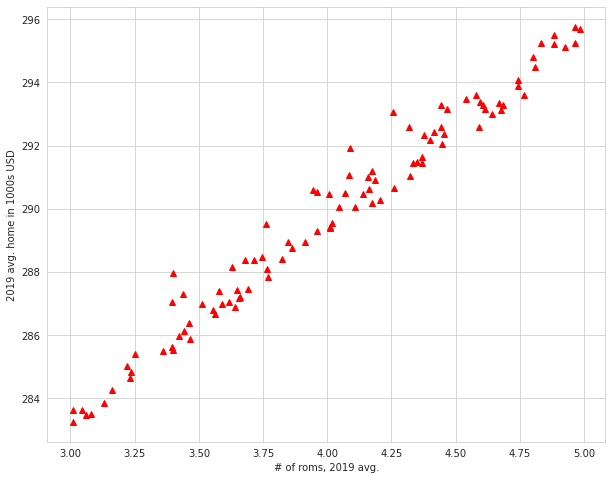

In [ ]:
plt.plot(rooms, price, 'r^')
plt.xlabel("# of roms, 2019 avg.")
plt.ylabel("2019 avg. home in 1000s USD")
plt.show()

In [ ]:
X = rooms
y = price
LinReg = LinearRegression()
LinReg.fit(X,y)
print(LinReg.intercept_, LinReg.coef_)

[265.31941092] [[6.10048332]]


In [ ]:
#LinReg.coef_ = 5.99 , estimated coefficients for the terms in the linear regression problem.

In [ ]:
print(LinReg.score(X,y))

0.971618686880978


In [ ]:
#close to 1 is the good thing of this linear regression model.

**Multiple Linear Regression Model**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

from pylab import rcParams

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

In [ ]:
%matplotlib inline
rcParams['figure.figsize']=5,4

In [ ]:
import seaborn as sb
sb.set_style('whitegrid')
from collections import Counter

In [ ]:
from google.colab import files
uploads = files.upload()

In [ ]:
import urllib.request

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
enroll = pd.read_csv('/content/drive/MyDrive/data/enrollment_forecast.csv')
enroll.columns = ['Year', 'roll', 'unem', 'hgrad', 'inc']
enroll.head()

,Year,roll,unem,hgrad,inc
0,1,5501,8.1,9552,1923
1,2,5945,7.0,9680,1961
2,3,6629,7.3,9731,1979
3,4,7556,7.5,11666,2030
4,5,8716,7.0,14675,2112


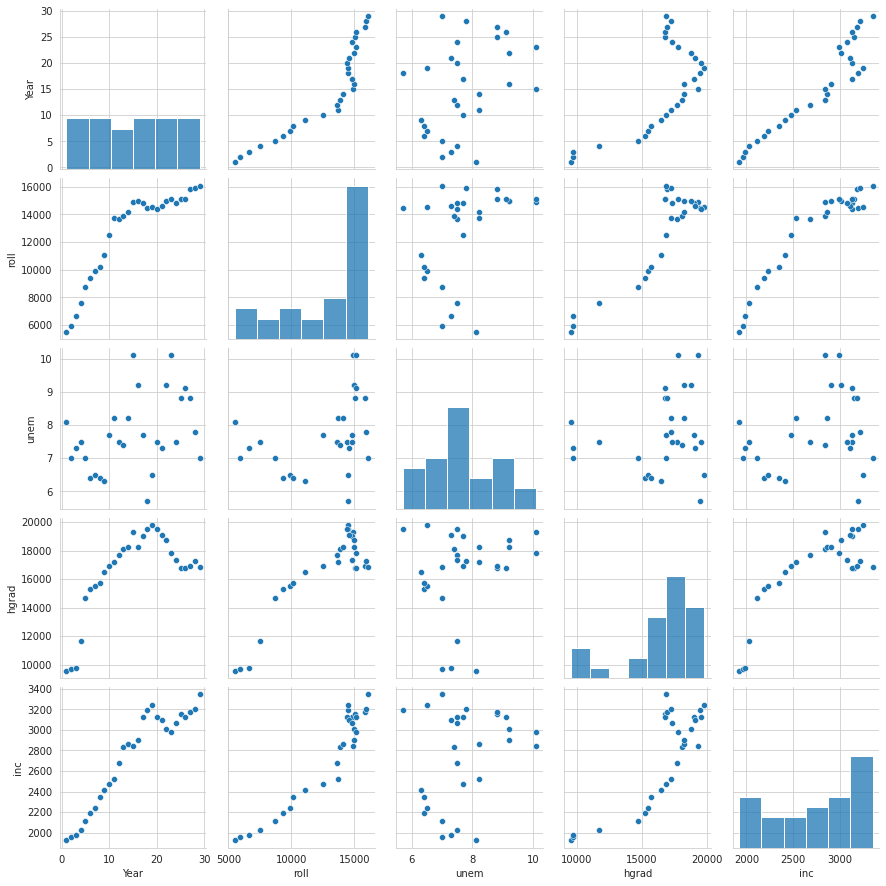

In [ ]:
sb.pairplot(enroll)

In [ ]:
# check to see it these variables to define they has correlation - close to 1!
print(enroll.corr())

           Year      roll      unem     hgrad       inc
Year   1.000000  0.900934  0.378305  0.670300  0.944287
roll   0.900934  1.000000  0.391344  0.890294  0.949876
unem   0.378305  0.391344  1.000000  0.177376  0.282310
hgrad  0.670300  0.890294  0.177376  1.000000  0.820089
inc    0.944287  0.949876  0.282310  0.820089  1.000000


In [ ]:
enroll_data = enroll[['unem', 'hgrad']].values

enroll_target = enroll[['roll']].values

enroll_data_names = ['unem', 'hgrad']

X, y = scale(enroll_data), enroll_target

In [ ]:
# checking for missing values

In [ ]:
missing_values = X==np.NAN
X[missing_values == True]

array([], dtype=float64)

In [ ]:
# ==. empty array above mean no missing values.

In [ ]:
LinReg = LinearRegression(normalize=True)

LinReg.fit(X,y)

print(LinReg.score(X,y))

0.8488812666133723


In [ ]:
# ~85% Now, the score that's printed out here is the R square of the prediction.
# It's a measure of how well the regression line that was predicted by the model
# actually matches the real values for college enrollment.
# Basically it is telling us how well the model performs in predicting college enrollment.
# A maximum good score would be .99 and a minimum score would be .01

**LOGISTIC REGRESSION**

In [ ]:
# Logistic regression is a simple machine learning method you can use to predict the value of a
# numeric categorical variable based on its relationship with predictor variables.
# Use cases: Customer churn prediction, employee attrition modeling, hazardous event prediction, purchse propensity vs. ad spend analysis

Logistic regression assumes that the data is free of missing values, that the predictant variable is binary, in other words that it only accepts two values, or that the predictant variable is ordinal, in other words a categorical variable with ordered values.
Logistic regression assumes that all predictors are independent of one another, and that there are at least 50 observations per predictor variable. This is to ensure reliable results.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

In [ ]:
%matplotlib inline
rcParams['figure.figsize']=5,4
sb.set_style('whitegrid')

In [ ]:
# logistic regression

In [ ]:
titanic_training = pd.read_csv('/content/drive/MyDrive/data/titanic-training-data.csv')
print(titanic_training.head())

   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]


In [ ]:
titanic_training.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
print(titanic_training.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [ ]:
# checking that your target variable is binary

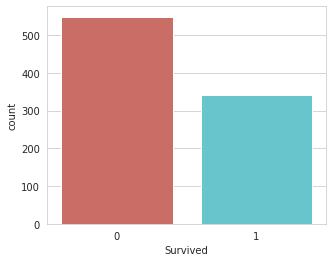

In [ ]:
sb.countplot(x='Survived', data=titanic_training, palette='hls')

In [ ]:
# checking for missing values

In [ ]:
titanic_training.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
titanic_training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# dropping missing values

In [ ]:
titanic_data = titanic_training.drop(['Name', 'Ticket', 'Cabin'], axis=1)
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


**IMPUTING MISSING VALUES**

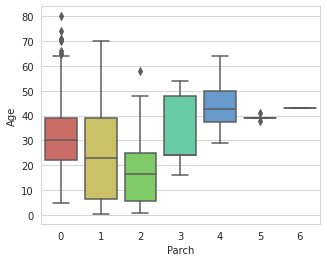

In [ ]:
sb.boxplot(x='Parch', y='Age', data=titanic_data, palette='hls')

In [ ]:
# Find the average ages of each group by groupby
Parch_groups = titanic_data.groupby(titanic_data['Parch'])
Parch_groups.mean()

,PassengerId,Survived,Pclass,Age,SibSp,Fare
Parch,,,,,,
0,445.255162,0.343658,2.321534,32.178503,0.237463,25.586774
1,465.110169,0.550847,2.203390,24.422000,1.084746,46.778180
2,416.662500,0.500000,2.275000,17.216912,2.062500,64.337604
3,579.200000,0.600000,2.600000,33.200000,1.000000,25.951660
4,384.000000,0.000000,2.500000,44.500000,0.750000,84.968750
5,435.200000,0.200000,3.000000,39.200000,0.600000,32.550000
6,679.000000,0.000000,3.000000,43.000000,1.000000,46.900000


In [ ]:
def age_approx(cols):
  Age = cols[0]
  Parch = cols[1]

  if pd.isnull(Age):
    if Parch == 0:
      return 32
    elif Parch == 1:
      return 24
    elif Parch == 2:
      return 17
    elif Parch == 3:
      return 33
    elif Parch == 4:
      return 45
    else:
      return 30 # is the mean of all Ages

  else:
    return Age

In [ ]:
titanic_data['Age'] = titanic_data[['Age', 'Parch']].apply(age_approx, axis=1)
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [ ]:
# there's only two missing values in Embarked out of 891, so just drop these two values, not cause us to lose too much important information.

In [ ]:
titanic_data.dropna(inplace=True)
titanic_data.reset_index(inplace=True, drop=True)

print(titanic_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.6+ KB
None


**CONVERTING CATEGORICAL VARIABLES TO A DUMMY INDICATOR**

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
gender_cat = titanic_data['Sex']
gender_encoded = label_encoder.fit_transform(gender_cat) # convert categorical values into binary values
gender_encoded[0:5]

array([1, 0, 0, 0, 1])

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [ ]:
# ==> 1 = male and 0 = female
gender_df = pd.DataFrame(gender_encoded, columns=['male_gender'])
gender_df.head()

,male_gender
0,1
1,0
2,0
3,0
4,1


In [ ]:
embarked_cat = titanic_data['Embarked']
embarked_encoded = label_encoder.fit_transform(embarked_cat)
embarked_encoded[0:100]

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       1, 2, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
binary_encoder = OneHotEncoder(categories = 'auto')
embarked_1hot = binary_encoder.fit_transform(embarked_encoded.reshape(-1,1))
embarked_1hot_mat = embarked_1hot.toarray()
embarked_df = pd.DataFrame(embarked_1hot_mat, columns=['C', 'Q', 'S'])
embarked_df.head()

,C,Q,S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [ ]:
titanic_data.drop(['Sex', 'Embarked'], axis=1, inplace=True)
titanic_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [ ]:
# concatenate (add new created binary values) in our new variables that we just generated for sex and embarked.
titanic_dmy = pd.concat([titanic_data, gender_df, embarked_df], axis=1, verify_integrity=True).astype(float)
titanic_dmy[0:5]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male_gender,C,Q,S
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,0.0,1.0
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,1.0,0.0,0.0
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,0.0,1.0
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,0.0,1.0
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,0.0,1.0


**CHECKING FOR INDEPENDENCE BETWEEN FEATURES**

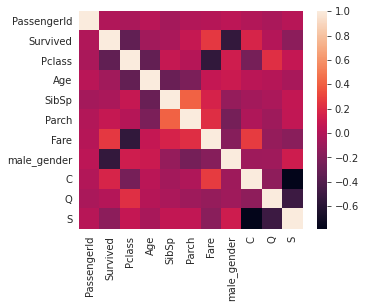

In [ ]:
sb.heatmap(titanic_dmy.corr())

In [ ]:
# as we see the Pclass and Fare is not definately independant of one another, so we need to drop it.
titanic_dmy.drop(['Fare', 'Pclass'],axis=1, inplace=True)
titanic_dmy.head()

,PassengerId,Survived,Age,SibSp,Parch,male_gender,C,Q,S
0,1.0,0.0,22.0,1.0,0.0,1.0,0.0,0.0,1.0
1,2.0,1.0,38.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3.0,1.0,26.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.0,1.0,35.0,1.0,0.0,0.0,0.0,0.0,1.0
4,5.0,0.0,35.0,0.0,0.0,1.0,0.0,0.0,1.0


**CHECKING THAT DATASET SIZE IS SUFFICIENT**

In [ ]:
# there re 6 predictive variables and 889 records in the dataset, its engough records to do logistic regression.
titanic_dmy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    float64
 1   Survived     889 non-null    float64
 2   Age          889 non-null    float64
 3   SibSp        889 non-null    float64
 4   Parch        889 non-null    float64
 5   male_gender  889 non-null    float64
 6   C            889 non-null    float64
 7   Q            889 non-null    float64
 8   S            889 non-null    float64
dtypes: float64(9)
memory usage: 62.6 KB


In [ ]:
#LOGISTIC REGRESSION: break dataset into Test and Training datasets
X_train, X_test, y_train, y_test = train_test_split(titanic_dmy.drop('Survived', axis=1), titanic_dmy['Survived'], test_size=0.2, random_state=200)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(711, 8)
(711,)


In [ ]:
X_train[0:5]

,PassengerId,Age,SibSp,Parch,male_gender,C,Q,S
719,721.0,6.0,0.0,1.0,0.0,0.0,0.0,1.0
165,167.0,24.0,0.0,1.0,0.0,0.0,0.0,1.0
879,882.0,33.0,0.0,0.0,1.0,0.0,0.0,1.0
451,453.0,30.0,0.0,0.0,1.0,1.0,0.0,0.0
181,183.0,9.0,4.0,2.0,1.0,0.0,0.0,1.0


**DEPLOYING AND EVALUATING THE LOGISTIC MODEL**

In [ ]:
LogReg = LogisticRegression(solver='liblinear')
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# now use this model to make prediction
y_pred = LogReg.predict(X_test)

**MODEL EVALUATION**
Classification report without cross-validation

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85       109
         1.0       0.79      0.71      0.75        69

    accuracy                           0.81       178
   macro avg       0.81      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178



In [ ]:
# K-fold cross-validation & confusion matrices
y_train_pred = cross_val_predict(LogReg, X_train, y_train, cv = 5)
confusion_matrix(y_train, y_train_pred)

array([[377,  63],
       [ 91, 180]])

In [ ]:
# these above confusion metrices: 377 and 180 are the number correct predictions, 91 and 63 are the numbers incorrect predictions.

In [ ]:
precision_score(y_train, y_train_pred)

0.7407407407407407

In [ ]:
# Make a test prediction

In [ ]:
titanic_dmy[863:864]

,PassengerId,Survived,Age,SibSp,Parch,male_gender,C,Q,S
863,866.0,1.0,42.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
test_passenger = np.array([866, 40, 0, 0, 0, 0, 0, 1]).reshape(1,-1)

print(LogReg.predict(test_passenger))
print(LogReg.predict_proba(test_passenger))

[1.]
[[0.26351831 0.73648169]]
